In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


In [5]:

stim_high_col='#88419d'
stim_other_col='#8c97c6'
stim_low_col='#c0d4e6'


unst_high_col='#2b8cbe'
unst_other_col='#7cccc4'
unst_low_col='#ccebc6'


In [6]:
groups_names_dict={'STIM-high':'human \nconstitutive-low',
                   'UNST-low':'human \nconstitutive-high',
                   'STIM-low':'mouse \nconstitutive-low',
                   'UNST-high':'mouse \nconstitutive-high'}

In [4]:
# most new filtration 13_7

In [7]:
#new pers

data_to_plot=pd.DataFrame({'PIC_high':{'group_genes_%':6.25 , 'rest_genes_%':1.681345076},
                           'PIC_low':{'group_genes_%':1.807229 , 'rest_genes_%':1.3006886},
                           'LF_high':{'group_genes_%':7.692307692 , 'rest_genes_%':1.022644266},
                           'LF_low':{'group_genes_%':10.71428571 , 'rest_genes_%':1.151907847}
                          },index=None)
data_to_plot




,PIC_high,PIC_low,LF_high,LF_low
group_genes_%,6.250000,1.807229,7.692308,10.714286
rest_genes_%,1.681345,1.300689,1.022644,1.151908


# old percentages with chip-seq bug
data_to_plot=pd.DataFrame({'PIC_high':{'group_genes_%':4.464286 , 'rest_genes_%':1.361089},
                           'PIC_low':{'group_genes_%':1.807229 , 'rest_genes_%':1.147666},
                           'LF_high':{'group_genes_%':4.807692 , 'rest_genes_%':0.876552},
                           'LF_low':{'group_genes_%':5.952381 , 'rest_genes_%':0.935925}
                          },index=None)
data_to_plot

In [8]:
data_to_plot['group_%'] = data_to_plot.index
data_to_plot

,PIC_high,PIC_low,LF_high,LF_low,group_%
group_genes_%,6.250000,1.807229,7.692308,10.714286,group_genes_%
rest_genes_%,1.681345,1.300689,1.022644,1.151908,rest_genes_%


In [9]:
data_to_plot.rename(columns={'group_%':'%','PIC_high':'STIM-high','PIC_low':'STIM-low','LF_high':'UNST-high','LF_low':'UNST-low' }, index={'group_genes_%': "group's genes" , 'rest_genes_%': "rest genes"},inplace=True)
data_to_plot.replace('group_genes_%',"group's genes",inplace=True)
data_to_plot.replace('rest_genes_%',"rest genes",inplace=True)


In [10]:
data_to_plot=data_to_plot.melt(id_vars='%')

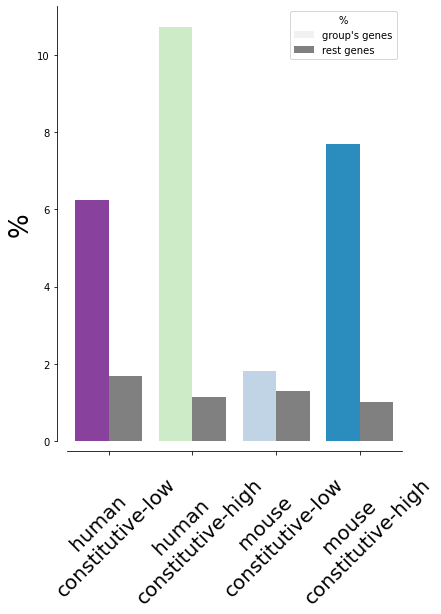

In [11]:
fig=plt.figure(figsize=(6,8))
#order=['STIM-high','STIM-low','UNST-high','UNST-low']
order=['STIM-high','UNST-low','STIM-low','UNST-high']
ax=sns.barplot(data=data_to_plot,x='variable',y='value',hue='%',color='grey',order=order)#.set(xlabel=None, ylable='%',xticklabels=['human constitutive-low','mouse constitutive-low','mouse constitutive-high','human constitutive-high' ])
ax.set_xticklabels(labels=[groups_names_dict[i] for i in order])
sns.despine(offset=10, trim=False, fig=fig)

#plt.yticks( fontsize=20)

#plt.tick_params(which='both',labelsize=20)
ax.tick_params(axis='x', rotation=45,labelsize=20)

#plt.xticks(rotation=90, fontsize=20)


plt.ylabel('%',fontsize=26)
plt.xlabel('',fontsize=20)



box1=ax.patches[0]
box1.set_facecolor(stim_high_col)
box2=ax.patches[1]
box2.set_facecolor(unst_low_col)
box3=ax.patches[2]
box3.set_facecolor(stim_low_col)
box4=ax.patches[3]
box4.set_facecolor(unst_high_col)


 #   box4=axs[0].patches[5]
  #  box4.set_facecolor(mus_stim_col)
   # axs[0].get_legend().remove()
plt.savefig(r'figure_output\persentage_barplot.pdf')
plt.savefig(r'figure_output\persentage_barplot.png')


In [12]:
from statsmodels.stats.multitest import fdrcorrection
# old with the bug! : pvals_for_FDR=[0.004221,0.445739,0.004976,0.002546]
pvals_for_FDR=[0.000280169,0.485864051,6.60E-05,4.02E-06]
rejected, qvalue_PIC = fdrcorrection(pvals_for_FDR,method='indep')
new_names=['human-const-low', 'mouse-const-low','mouse-const-high', 'human-const-high']
old_names=['stim-high','stim-low','unst-high','unt-low']
for i in range(len(new_names)):
    print(new_names[i])
    print(old_names[i])
    print(pvals_for_FDR[i])
    print(qvalue_PIC[i])

    print()


human-const-low
stim-high
0.000280169
0.00037355866666666666

mouse-const-low
stim-low
0.485864051
0.485864051

mouse-const-high
unst-high
6.6e-05
0.000132

human-const-high
unt-low
4.02e-06
1.608e-05

